### Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they dont know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

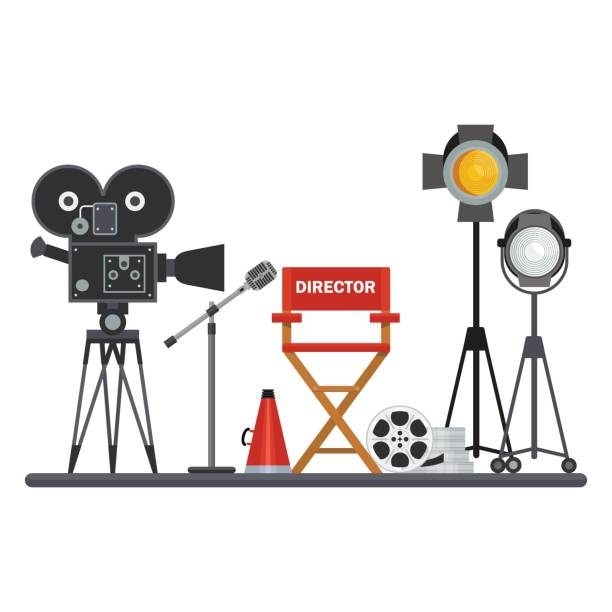

### Microsoft Mission
Our mission is to empower every person and every organization on the planet to achieve more.

As a result of the mission that Microsoft implements we will b focusing domestically first. 
We want to focus on ratings as well 
and we want to see if there is something that we can mimick to start.


Overview

In [1]:
import pandas as pd
import pandas as pd
from random import gauss as gs, uniform as uni, seed
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import re 
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
!ls

Movie Analysis Microsoft.ipynb
Phase_1_Movie_Time Information.ipynb
zippedData


In [3]:
!ls zippedData/

bom.movie_gross.csv.gz
imdb.name.basics.csv.gz
imdb.title.akas.csv.gz
imdb.title.basics.csv.gz
imdb.title.crew.csv.gz
imdb.title.principals.csv.gz
imdb.title.ratings.csv.gz
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz
untitled


In [4]:
imbd_titles = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imbd_titles
#shape 146144, 6, tconst	primary_title	original_title	start_year	runtime_minutes	genres

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [5]:
crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
crew
#shape 146144, 3 tconst	directors	writers

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825


In [6]:
director = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
director
#shape 606648 rows × 6 columns nconst	primary_name	birth_year	death_year	primary_profession	known_for_titles

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [7]:
imbd_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
imbd_ratings
#shape 73856, 3 tconst	averagerating	numvotes

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [8]:
movie_gross_bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_gross_bom
#Shape 3387, 5 title	studio	domestic_gross	foreign_gross	year

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [9]:
budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
budget 
#Shape 5782, 6,  id	release_date	movie	production_budget	domestic_gross	worldwide_gross

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [10]:
#merge movie titles and ratings based on their common column 'tconst'
imdb_title_ratings = pd.merge(imbd_titles, imbd_ratings, left_on='tconst', right_on='tconst')
imdb_title_ratings

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [11]:
rt_reviews = pd.read_csv("zippedData/rt.reviews.tsv.gz", sep='\t', encoding = "ISO-8859-1")

### Data Cleaning 

In [12]:
#merge title_ratings dataframe with bom_gross to get the gross per movie title. Clean so there's no duplicates
movie_df = pd.merge(imdb_title_ratings, movie_gross_bom, left_on=['primary_title','start_year'], right_on=['title', 'year'])
movie_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000,2012
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,Uni.,652300000.0,"1,019.4",2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842,tt8290698,The Spy Gone North,Gongjak,2018,137.0,Drama,7.2,1620,The Spy Gone North,CJ,501000.0,NaN,2018
1843,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.5,607,How Long Will I Love U,WGUSA,747000.0,82100000,2018
1844,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Helicopter Eela,Eros,72000.0,NaN,2018
1845,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",6.4,322,Last Letter,CL,181000.0,NaN,2018


In [13]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1847 entries, 0 to 1846
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           1847 non-null   object 
 1   primary_title    1847 non-null   object 
 2   original_title   1847 non-null   object 
 3   start_year       1847 non-null   int64  
 4   runtime_minutes  1843 non-null   float64
 5   genres           1845 non-null   object 
 6   averagerating    1847 non-null   float64
 7   numvotes         1847 non-null   int64  
 8   title            1847 non-null   object 
 9   studio           1845 non-null   object 
 10  domestic_gross   1837 non-null   float64
 11  foreign_gross    1269 non-null   object 
 12  year             1847 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 202.0+ KB


In [14]:
movie_df.drop(columns = ['foreign_gross'], inplace = True)
#drop foreign gross as we only want to remain domestic to start. 

In [15]:
movie_df.shape

(1847, 12)

In [16]:
movie_df = movie_df.drop_duplicates(subset='primary_title', keep='first')
movie_df.shape
#we don't want any same movie titles 

(1822, 12)

In [17]:
#We also want to drop the entire original_title column as that offers no insight. 
movie_df.drop(columns='original_title', inplace=True)

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
movie_df.dropna(axis=0, inplace=True)
movie_df.shape

<ipython-input-18-84e84bee56e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.dropna(axis=0, inplace=True)


(1811, 11)

### Feature Engineering/Visiuaizaion

In [19]:
#Seperating by number of votes for movies 
movies_voted = movie_df.groupby('primary_title')['numvotes'].agg('sum')

#number of votes by the genre
genres_voted = movie_df.groupby('genres')['numvotes'].agg('sum')

In [20]:
movies_voted.quantile(.45)


28873.5

In [21]:
genres_voted.quantile(.45)

111915.0

In [22]:
genres = ['Action', 'Comedy', 'Horror', 'Western', 'Documentary', 'Sci-Fi', 'Mystery', 'Family', 'Fantasy', 'Drama', 'Thriller', 'Romance', 'Biography']

In [23]:
#function to better list genres
def find_genre(genre_list):
    for gen in genre_list:
        if gen in genres:
            return gen

In [24]:
#removes the excess Genre Titles
movie_df['real_genres'] = movie_df['genres'].map(lambda x: find_genre(x.split(',')))

<ipython-input-24-3f0ebf5c75e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['real_genres'] = movie_df['genres'].map(lambda x: find_genre(x.split(',')))


In [25]:
movie_df

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,year,real_genres
0,tt0315642,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,2016,Action
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,2012,Drama
2,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,2013,Comedy
3,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,2014,Action
4,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,Uni.,652300000.0,2015,Action
...,...,...,...,...,...,...,...,...,...,...,...,...
1842,tt8290698,The Spy Gone North,2018,137.0,Drama,7.2,1620,The Spy Gone North,CJ,501000.0,2018,Drama
1843,tt8404272,How Long Will I Love U,2018,101.0,Romance,6.5,607,How Long Will I Love U,WGUSA,747000.0,2018,Romance
1844,tt8427036,Helicopter Eela,2018,135.0,Drama,5.4,673,Helicopter Eela,Eros,72000.0,2018,Drama
1845,tt9078374,Last Letter,2018,114.0,"Drama,Romance",6.4,322,Last Letter,CL,181000.0,2018,Drama


In [26]:
#we wanna work with movies that have a certain number of votes only.  

no_votes = movie_df.loc[movie_df['numvotes'] >= 28873.5]


In [27]:
#lets drop the genres column we renamed it to real_genres
movie_df.drop(columns= ['genres'], inplace = True)

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


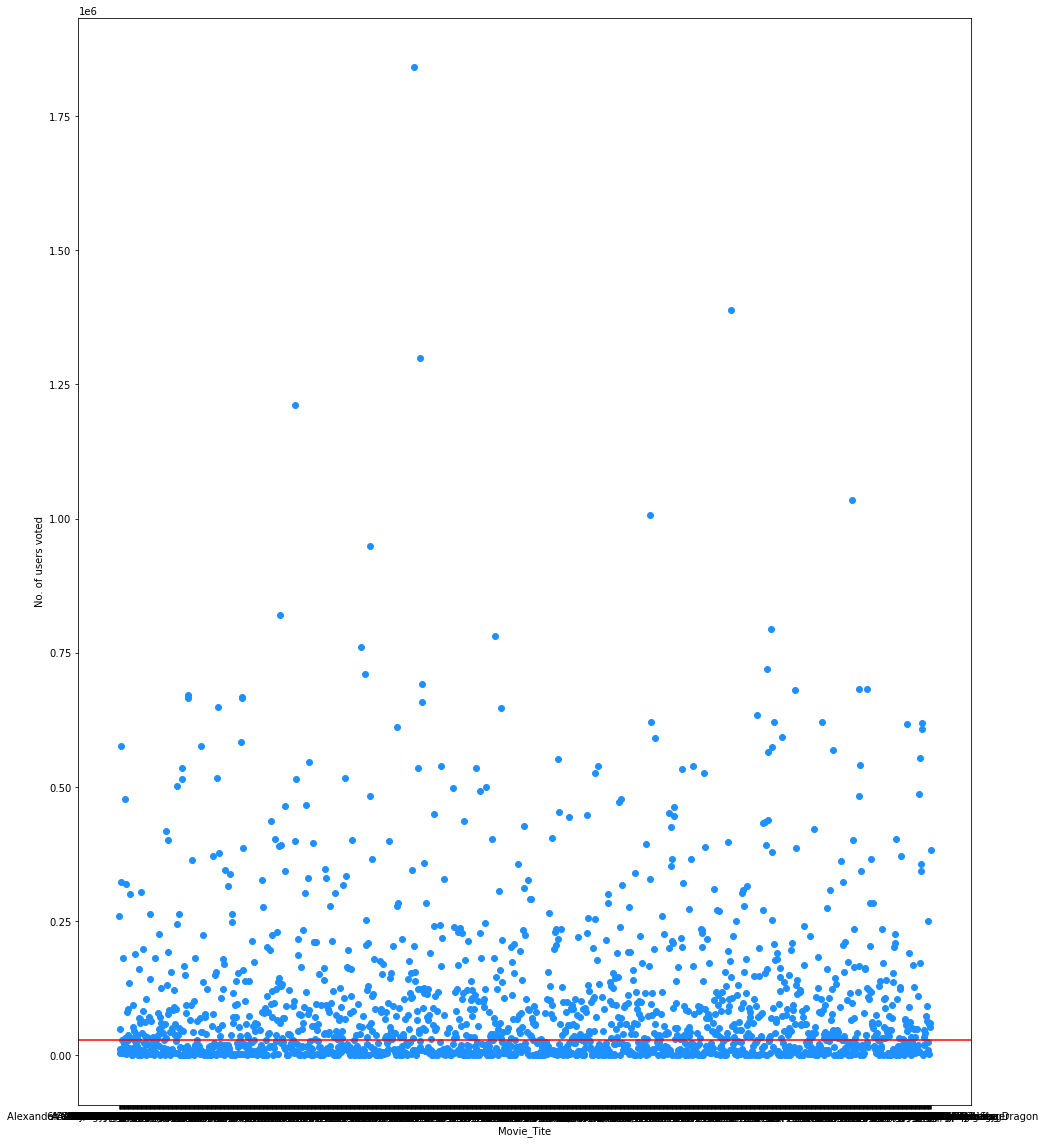

In [28]:
#shows the number of users who voted on a movie in a scatter the line referenes the 45th quantile 

f,ax = plt.subplots(1,1,figsize=(16,20))
plt.scatter(movies_voted.index,movies_voted,color='dodgerblue')
plt.axhline(y=28873.5,color='r')
plt.xlabel('Movie_Tite')
plt.ylabel('No. of users voted')
plt.show()

Getting The top Genres by domestic Gross 

In [29]:
#Combining the genres by genres by common themes 
Action = movie_df.loc[movie_df['real_genres'] == 'Action'] 
Comedy = movie_df.loc[movie_df['real_genres'] == 'Comedy']
Western = movie_df.loc[movie_df['real_genres'] == 'Western']
Mystery = movie_df.loc[movie_df['real_genres'] == 'Mystery']
Family = movie_df.loc[movie_df['real_genres'] == 'Family']
Sci_Fi = movie_df.loc[movie_df['real_genres'] == 'Fantasy'],movie_df.loc[movie_df['real_genres'] == 'Sci-Fi']
Thriller = movie_df.loc[movie_df['real_genres'] == 'Thriller'],movie_df.loc[movie_df['real_genres'] == 'Horror']
Romance = movie_df.loc[movie_df['real_genres'] == 'Romance'], movie_df.loc[movie_df['real_genres'] == 'Drama']
Biography = movie_df.loc[movie_df['real_genres'] == 'Biography'],  movie_df.loc[movie_df['real_genres'] == 'Documentary']

In [30]:
gross_by_genre = movie_df.groupby(['real_genres'])['domestic_gross'].apply(lambda x: x.mean()).reset_index()


In [31]:
gross_by_genre.sort_values('domestic_gross',ascending=False)

,real_genres,domestic_gross
5,Family,8.394871e+07
0,Action,7.005804e+07
8,Mystery,6.617036e+07
2,Comedy,4.505564e+07
6,Fantasy,4.429914e+07
7,Horror,3.618194e+07
1,Biography,2.555194e+07
4,Drama,2.158059e+07
9,Romance,8.138500e+06
11,Thriller,5.302155e+06


Text(0.5, 1.0, 'Top Grossing Movie Genres')

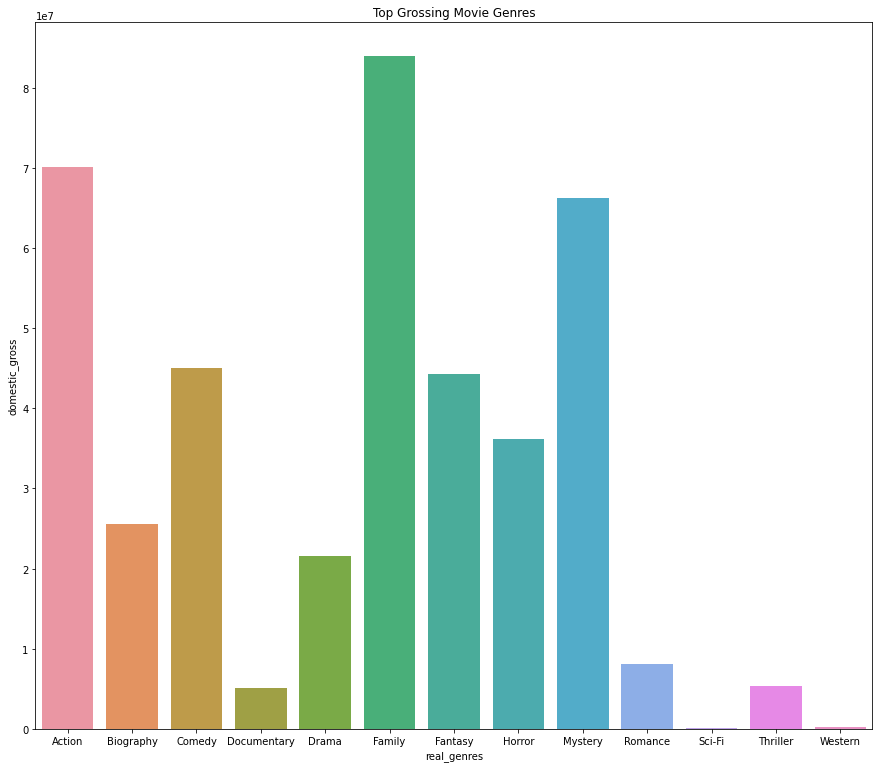

In [32]:
f,ax = plt.subplots(figsize=(15,13))
sns.barplot(x=gross_by_genre['real_genres'],y=gross_by_genre['domestic_gross'])
plt.title('Top Grossing Movie Genres')

Text(0.5, 1.0, 'Top 15 Movie Studios')

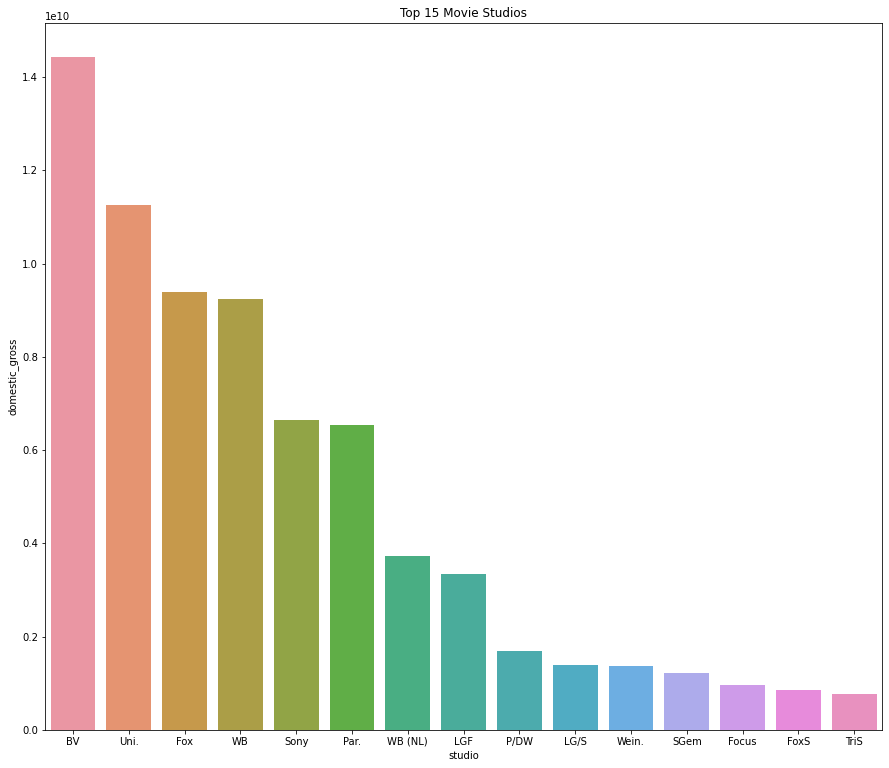

In [33]:
#Top Ten Movie Studios 


top_studios = movie_df.groupby(['studio']).sum()['domestic_gross'].sort_values(ascending=False).head(15).reset_index()
top_studios,

ax = plt.subplots(figsize=(15,13))
sns.barplot(x=top_studios['studio'],y=top_studios['domestic_gross'])
plt.title('Top 15 Movie Studios')

In [34]:
#Getting the top Movie Publishing Compnies To graph
reviews = rt_reviews.groupby(['publisher']).count()['review'].sort_values(ascending=False).reset_index()

Text(0.5, 1.0, 'Top 15 Movie Review Companies')

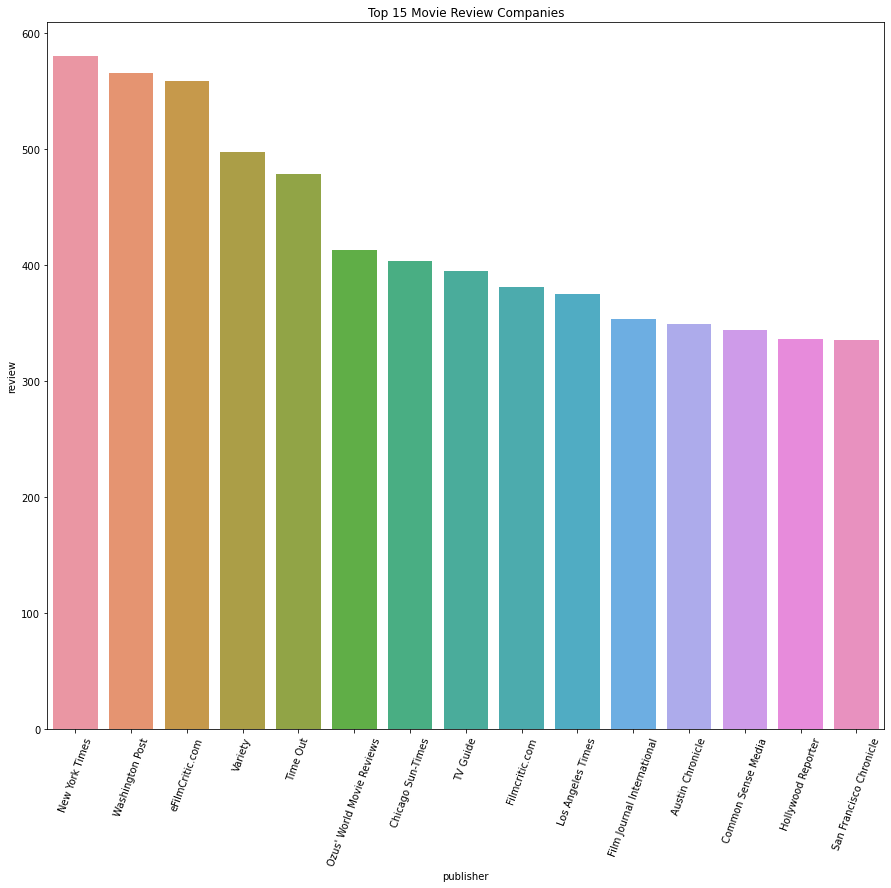

In [35]:
ax = plt.subplots(figsize=(15,13))
sns.barplot(x=reviews['publisher'].head(15),y=reviews['review'].head(15))
plt.xticks(rotation=70)
plt.title('Top 15 Movie Review Companies')

## Conclusion 
It is reccomended that Microsoft studios focus on the domestic side of the world first and foremost before tackling foreign gross.

As a result the top 5 movie genres that the Microsoft movie studio should start with is 
    - Family
    -Fantasy
    -Action
    - Mystery
    -Comedy 
    
The Studio Shoud Also Mimick the top 3 domestic grossing studios
    -BV
    -Uni
    -Fox
    
You also want to invite the 5 publishing companies to review the movie 
    -New York Times
    -Washington Post 
    -eFilmCritic.com
    -Variety
    -Time out
    
    
 ## Future Improvements 
   Look at international gross and determine if there is a genre that works best internationally
   Find the Best Directors for the movies as the director is one of the most important people whoever directs the most and best grossing films
   Study the bottom studios to find out what not to do. such as if they are making western movies or not. 